In [ ]:
from numpy import sin, cos, mgrid, pi, sqrt
from mayavi import mlab

mlab.figure(fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))
u, v = mgrid[- 0.035:pi:0.01, - 0.035:pi:0.01]

X = 2 / 3. * (cos(u) * cos(2 * v)
        + sqrt(2) * sin(u) * cos(v)) * cos(u) / (sqrt(2) -
                                                 sin(2 * u) * sin(3 * v))
Y = 2 / 3. * (cos(u) * sin(2 * v) -
        sqrt(2) * sin(u) * sin(v)) * cos(u) / (sqrt(2)
        - sin(2 * u) * sin(3 * v))
Z = -sqrt(2) * cos(u) * cos(u) / (sqrt(2) - sin(2 * u) * sin(3 * v))
S = sin(u)

mlab.mesh(X, Y, Z, scalars=S, colormap='YlGnBu', )

# Nice view from the front
mlab.view(.0, - 5.0, 4)
mlab.show()

In [138]:
def compute_radius(x,y,z):
    W = np.array([[0.1,2,3],[-1,3,2],[0.3,-2,1]])
    U = np.einsum('k,ij->kij',W[:,0], x) +np.einsum('k,ij->kij',W[:,1], y)+np.einsum('k,ij->kij',W[:,2], z)
    R = np.linalg.norm(U, axis=0)
    return R
def compute_radius(x,y,z):
    W = np.array([[0.1,2,3],[-1,3,2],[0.3,-2,1]])
    W = np.eye(3)
    c = 0.
    a = 10.
    C = np.array([[0,0,-c],[-c,0,0],[0,-c,0]])
    F = np.array([[a,0,0],[0,a,0],[0,0,a]])
    #C = np.zeros([3,3])
    
    U = np.einsum('k,ij->kij',W[0,:], x) +np.einsum('k,ij->kij',W[1,:], y)+np.einsum('k,ij->kij',W[2,:], z)
    #U = 0
    U += np.einsum('k,ij->kij',C[0,:], y*x) +np.einsum('k,ij->kij',C[1,:], y*z)+np.einsum('k,ij->kij',C[2,:], z*x)
    U += np.einsum('k,ij->kij',F[0,:], x**4) +np.einsum('k,ij->kij',F[1,:], y**4)+np.einsum('k,ij->kij',F[2,:], z**4)
    R = np.linalg.norm(U, axis=0)
    return R
def scaled_points(x,y,z,R):
    return R*x,R*y,R*z

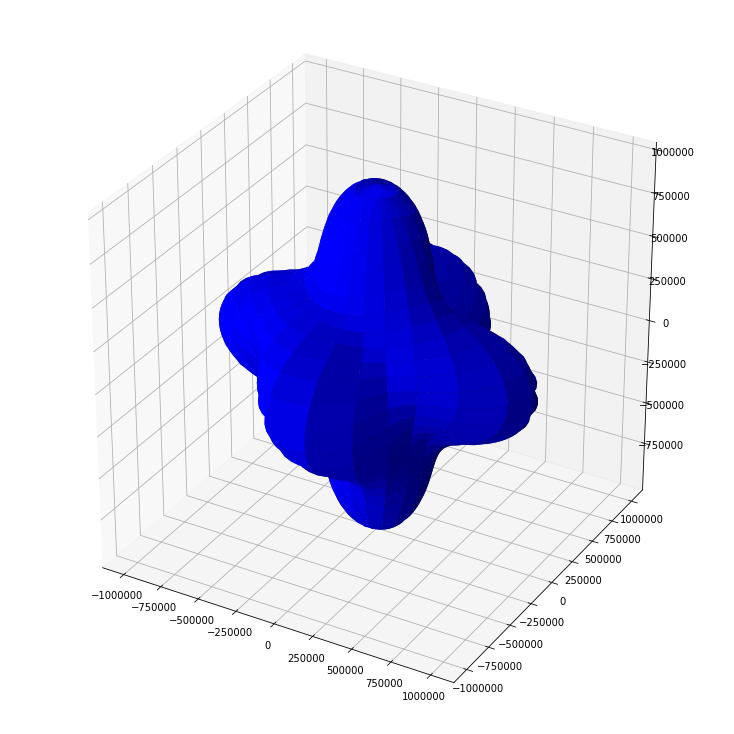

In [137]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
#ax=fig.add_subplot(111,projection='3d')
u= np.linspace(0,2*np.pi,100)
v = np.linspace(0,np.pi,100)

# uniform on a sphere
x = 10*np.outer(np.cos(u),np.sin(v))
y = 10*np.outer(np.sin(u), np.sin(v))
z = 10*np.outer(np.ones(np.size(u)), np.cos(v))

W = np.array([[0.1,2,3],[-1,3,2],[0.3,-2,1]])



R = compute_radius(x,y,z)

X,Y,Z = scaled_points(x,y,z,R)





ax.plot_surface(X,Y,Z,rstride=4,cstride=4,color='b')
plt.show()



In [49]:
W[0,:]

array([0.1, 2. , 3. ])